## Numbers ##

mu*: -5.011495754472448
var*: -3.638315318208253
95% confidence interval: [-8.826369444758015, -1.196622064186882]


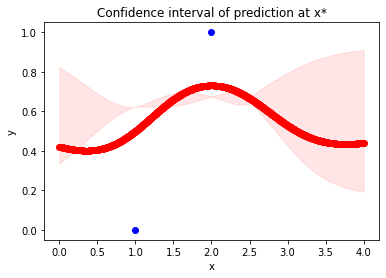

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define function values and their derivatives
f = np.array([0, 1, 2, 0])

# Define kernel function and its derivatives
def kernel(x, y):
    return np.exp(-0.5 * (x - y)**2)

def kernel_derivative(x, y):
    return (y - x) * kernel(x, y)

def kernel_second_derivative(x, y):
    return (1 - (y - x)**2) * kernel(x, y)

# Define points and values
x = np.array([1, 2])
f_values = np.array([0, 1])
df_values = np.array([2, 0])

# Construct covariance matrix
K = np.zeros((4, 4))
for i in range(2):
    for j in range(2):
        K[i, j] = kernel(x[i], x[j])
        K[i, j+2] = kernel_derivative(x[i], x[j])
        K[i+2, j] = K[j, i+2]
        K[i+2, j+2] = kernel_second_derivative(x[i], x[j])

x_stars = np.linspace(0, 4, 1000)  # range of x_star values
mu_stars = []
upper_bounds = []
lower_bounds = []

for x_star in x_stars:
    # Construct covariance vector K_*
    K_star = np.zeros(4)
    for i in range(2):
        K_star[i] = kernel(x_star, x[i])
        K_star[i+2] = kernel_derivative(x_star, x[i])

    # Calculate predictive mean mu* and variance var*
    K_inv_f = np.linalg.solve(K, f)
    mu_star = K_star @ K_inv_f
    var_star = kernel(x_star, x_star) - K_star @ np.linalg.solve(K, K_star)

    # Apply logistic transformation
    mu_star = 1 / (1 + np.exp(-mu_star))
    upper_bound = 1 / (1 + np.exp(-mu_star + 2*np.sqrt(np.abs(var_star))))
    lower_bound = 1 / (1 + np.exp(-mu_star - 2*np.sqrt(np.abs(var_star))))

    mu_stars.append(mu_star)
    upper_bounds.append(upper_bound)
    lower_bounds.append(lower_bound)

# Plotting
plt.plot(x, f_values, 'bo')
plt.plot(x_stars, mu_stars, 'ro')
plt.fill_between(x_stars, lower_bounds, upper_bounds, color='r', alpha=0.1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Confidence interval of prediction at x*')
plt.show()


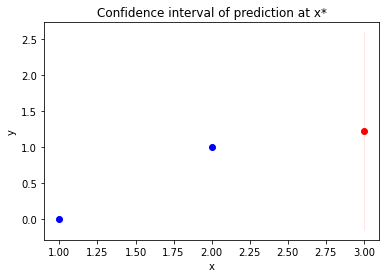